In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import anderson, kstest, shapiro, norm, uniform
from statsmodels.stats.diagnostic import lilliefors

## Задание 1

1. Сгенерируйте 3 пары выборок заданного объема из разных законов распределения (два нормальных распределения, нормальное и отличное от нормального, два отличных от нормального распределения). Объем и законы распределения выбрать самостоятельно.

In [2]:
size = 100
alpha = 0.05

#Генерация выборок
#Два нормальных распределения
normal_1 = np.random.normal(10, 2, size=size)
normal_2 = np.random.normal(15, 2, size=size)

#Нормально и отличное от нормального
normal_3 = np.random.normal(20, 2, size=size)
expo = stats.expon.rvs(scale=1, size=size)

#Два отличных от нормального
unif = stats.uniform.rvs(scale=1, size=size)
logg = stats.lognorm.rvs(s=0.99,scale=1, size=size)

2. Выдвинуть и проверить на заданном уровне значимости 𝛼 для каждой пары выборок гипотезы:
- о равенстве двух дисперсий 𝐻: $𝜎_1 = 𝜎_2$
- о равенстве двух выборочных средних 𝐻: $𝑚_1 = 𝑚_2$

Выбор критериев должен быть обусловлен видом распределения исходных выборок (проверить факт нормальности распределения выборок с 
помощью одного из критериев согласия, например Шапиро-Уилка) и равенством дисперсий (для выбора критерия для проверки гипотез о математических ожиданиях).

In [3]:
def check_normal_dist(normal):
    _, p_value = stats.shapiro(normal)
    if p_value > alpha:
        print('Гипотеза о нормальности принимается')
    else:
        print('Гипотеза о нормальности отклоняется')

In [4]:
def F_test(s1, s2):
    # Проверка равенства дисперсий по F-критерию        
    var_1 = np.var(s1, ddof=1)
    var_2 = np.var(s2, ddof=1)

    print(f'Оценка дисперсии 1: {var_1:.4f}')
    print(f'Оценка дисперсии 2: {var_2:.4f}')

    if var_1 > var_2:
        F_score = var_1 / var_2
    else:
        F_score = var_2 / var_1
    print(f'Значение статистики: {F_score:.4f}')

    pvalue = 1 - stats.f.cdf(F_score, size-1, size-1)
    print(f'Значение p-value: {pvalue:.4f}')

    if pvalue > alpha:
        print(f'Гипотеза о равенстве дисперсий по F-критерию принимается')
    else:
        print(f'Гипотеза о равенстве дисперсий по F-критерию отклоняется')

In [5]:
def T_test(s1, s2, equal_var=True):
    _, p_value_ttest = stats.ttest_ind(s1, s2, equal_var=equal_var)
    print(f'Оценка выборочных средних: {p_value_ttest:.4f}')

    if p_value_ttest > alpha:
        print('Гипотеза о равенстве выборочных средних по t-критерию принимается')
    else:
        print('Гипотеза о равенстве выборочных средних по t-критерию отклоняется')

In [6]:
def MN_test(s1, s2):
    _, p_value = stats.mannwhitneyu(s1, s2)
    print(f"Оценка выборочных средних: {p_value:.4f}")

    if p_value > alpha:
        print('Гипотеза о равенстве выборочных средних по критерию Манна-Уитни принимается')
    else:
        print('Гипотеза о равенстве выборочных средних по критерию Манна-Уитни отклоняется')

In [7]:
def flinger_test(s1, s2):
    _, p_value = stats.fligner(s1, s2)
    if p_value > alpha:
        print('Гипотеза о равенстве дисперсий по критерию Флигнера принимается')
    else:
        print('Гипотеза о равенстве дисперсий по критерию Флигнера отклоняется')

In [8]:
check_normal_dist(normal_1)
check_normal_dist(normal_2)

Гипотеза о нормальности принимается
Гипотеза о нормальности принимается


In [9]:
F_test(normal_1, normal_2)

Оценка дисперсии 1: 3.2859
Оценка дисперсии 2: 4.2200
Значение статистики: 1.2843
Значение p-value: 0.1075
Гипотеза о равенстве дисперсий по F-критерию принимается


In [10]:
T_test(normal_1, normal_2, equal_var=True)

Оценка выборочных средних: 0.0000
Гипотеза о равенстве выборочных средних по t-критерию отклоняется


In [11]:
check_normal_dist(normal_3)
check_normal_dist(expo)

Гипотеза о нормальности принимается
Гипотеза о нормальности отклоняется


In [12]:
F_test(normal_3, expo)

Оценка дисперсии 1: 3.7681
Оценка дисперсии 2: 0.9868
Значение статистики: 3.8185
Значение p-value: 0.0000
Гипотеза о равенстве дисперсий по F-критерию отклоняется


In [13]:
T_test(normal_3, expo, equal_var=True)

Оценка выборочных средних: 0.0000
Гипотеза о равенстве выборочных средних по t-критерию отклоняется


In [14]:
check_normal_dist(unif)
check_normal_dist(logg)

Гипотеза о нормальности отклоняется
Гипотеза о нормальности отклоняется


In [15]:
F_test(unif, logg)

Оценка дисперсии 1: 0.0845
Оценка дисперсии 2: 6.9819
Значение статистики: 82.6173
Значение p-value: 0.0000
Гипотеза о равенстве дисперсий по F-критерию отклоняется


In [16]:
T_test(unif, logg, equal_var=True)

Оценка выборочных средних: 0.0000
Гипотеза о равенстве выборочных средних по t-критерию отклоняется


## Задание 2

1. 1000 раз сгенерируйте выборки из нормального и любого отличного от нормального закона распределения для различных N. 
2. Примените критерии: Anderson-Darling test, Lilliefors test, Kolmogorov-Smirnov test и Shapiro-Wilk test. 
3. Сравните их мощности.

In [25]:
# Параметры для эксперимента
N_values = [10, 30, 50, 100, 200]  # различные размеры выборок
iterations = 1000  # количество итераций для каждого размера выборки
alpha = 0.05  # уровень значимости

# Функция для оценки мощности критерия
def test_power(test_func, dist_func, N, iterations, alpha):
    rejection_count = 0
    for _ in range(iterations):
        sample = dist_func(size=N)
        stat, p_value = test_func(sample)
        if p_value < alpha:
            rejection_count += 1
    power = rejection_count / iterations
    return power

# Определение тестов
def anderson_darling_test(sample):
    result = anderson(sample)
    return result.statistic, result.significance_level[2] / 100  # p-value из таблицы для уровня значимости 5%

def lilliefors_test(sample):
    stat, p_value = lilliefors(sample, dist='norm')
    return stat, p_value

def kolmogorov_smirnov_test(sample):
    stat, p_value = kstest(sample, 'norm', args=(np.mean(sample), np.std(sample, ddof=1)))
    return stat, p_value

def shapiro_wilk_test(sample):
    stat, p_value = shapiro(sample)
    return stat, p_value

In [26]:
# Тестируемые распределения
normal_dist = lambda size: np.random.normal(loc=0, scale=1, size=size)  # нормальное распределение
non_normal_dist = lambda size: np.random.exponential(scale=1, size=size)  # экспоненциальное распределение как пример отличного от нормального

# Сравнение мощностей
results = {test: [] for test in ['Anderson-Darling', 'Lilliefors', 'Kolmogorov-Smirnov', 'Shapiro-Wilk']}

for N in N_values:
    power_anderson = test_power(anderson_darling_test, non_normal_dist, N, iterations, alpha)
    power_lilliefors = test_power(lilliefors_test, non_normal_dist, N, iterations, alpha)
    power_kolmogorov = test_power(kolmogorov_smirnov_test, non_normal_dist, N, iterations, alpha)
    power_shapiro = test_power(shapiro_wilk_test, non_normal_dist, N, iterations, alpha)

    results['Anderson-Darling'].append(power_anderson)
    results['Lilliefors'].append(power_lilliefors)
    results['Kolmogorov-Smirnov'].append(power_kolmogorov)
    results['Shapiro-Wilk'].append(power_shapiro)

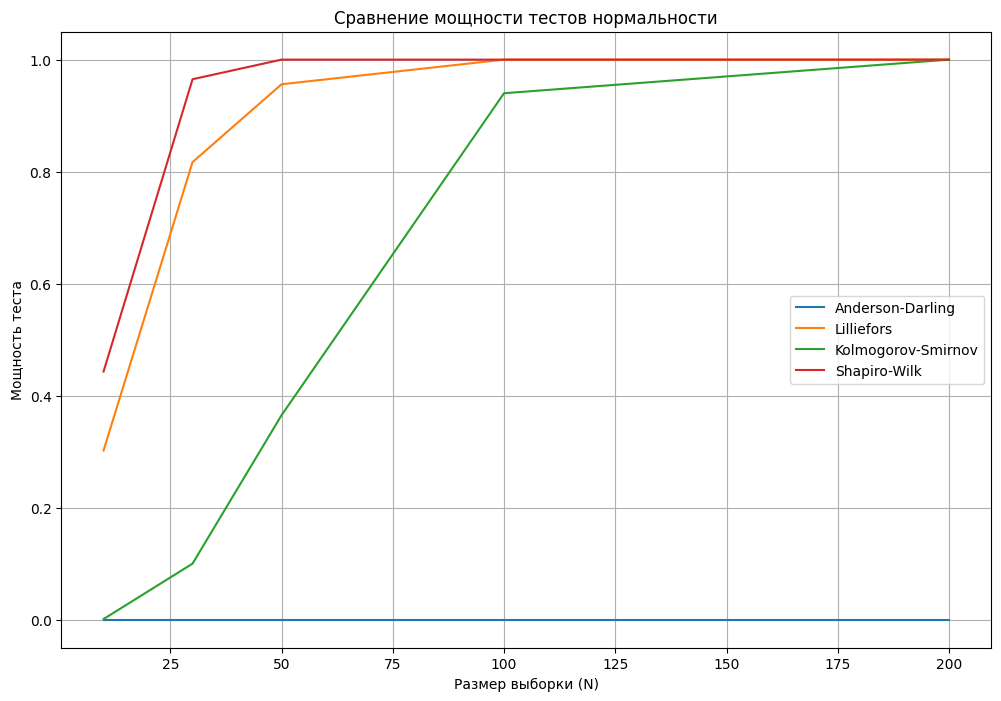

In [27]:
plt.figure(figsize=(12, 8))
for test_name, powers in results.items():
    plt.plot(N_values, powers, label=test_name)

plt.xlabel('Размер выборки (N)')
plt.ylabel('Мощность теста')
plt.title('Сравнение мощности тестов нормальности')
plt.legend()
plt.grid(True)
plt.show()